In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [19]:
# seed 값 고정
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [20]:
fa_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fa_mnist.load_data()

In [21]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

### np.array()에서 [...은 생략을 나타냄]

In [28]:
# test_mat = np.array(range(12)).reshape(2,3,2)
# print(test_mat[...])
# test_mat[0,...]

print(X_train.shape)
X_train = X_train[..., np.newaxis]
print(X_train.shape)
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

(48000, 28, 28, 1)
(48000, 28, 28, 1, 1)


In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 padding='same', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dropout_6 (Dropout)         (None, 10816)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1384576   
                                                      

In [25]:
fit_model=model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.4692 - accuracy: 0.8344 - val_loss: 0.2894 - val_accuracy: 0.8939
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3117 - accuracy: 0.8872 - val_loss: 0.2413 - val_accuracy: 0.9078
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2626 - accuracy: 0.9039 - val_loss: 0.2372 - val_accuracy: 0.9113
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2321 - accuracy: 0.9132 - val_loss: 0.2179 - val_accuracy: 0.9199
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2045 - accuracy: 0.9249 - val_loss: 0.2249 - val_accuracy: 0.9206
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1888 - accuracy: 0.9304 - val_loss: 0.2118 - val_accuracy: 0.9247
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1711 - accuracy: 0.9355 - val_loss: 0.2014 - val_accura

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2278 - accuracy: 0.9248


[0.22783516347408295, 0.9247999787330627]

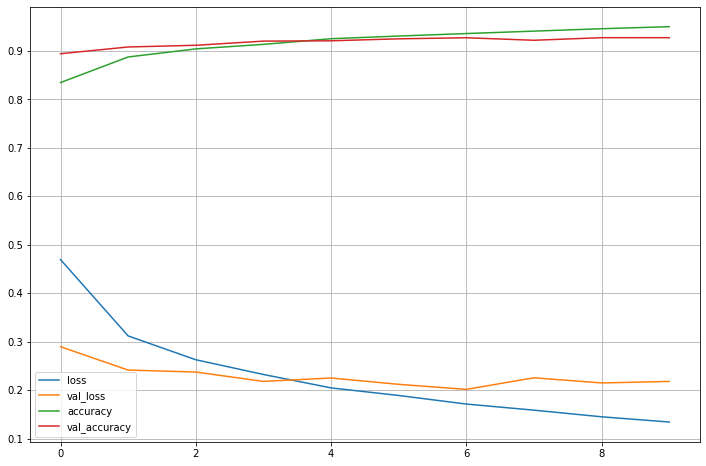

In [27]:
plot_target=['loss', 'val_loss','accuracy','val_accuracy']
plt.figure(figsize=(12, 8))
for each in plot_target:
  plt.plot(fit_model.history[each], label=each)
plt.legend()
plt.grid()
plt.show()